Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import dataset

In [2]:
df = pd.read_csv("top-5000-youtube-channels.csv")
df.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433


In [3]:
df.tail()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
4995,"4,996th",B+,Uras Benlioğlu,706,2072942,441202795
4996,"4,997th",B+,HI-TECH MUSIC LTD,797,1055091,377331722
4997,"4,998th",B+,Mastersaint,110,3265735,311758426
4998,"4,999th",B+,Bruce McIntosh,3475,32990,14563764
4999,"5,000th",B+,SehatAQUA,254,21172,73312511


Data information

In [4]:
df.shape

(5000, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           5000 non-null   object
 1   Grade          5000 non-null   object
 2   Channel name   5000 non-null   object
 3   Video Uploads  5000 non-null   object
 4   Subscribers    5000 non-null   object
 5   Video views    5000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 234.5+ KB


In [6]:
# convert columns 'Video Uploads' and 'Subscribers' to numeric dtypes

df['Video Uploads'] = pd.to_numeric(df['Video Uploads'], errors='coerce')
df['Subscribers'] = pd.to_numeric(df['Subscribers'], errors='coerce')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           5000 non-null   object 
 1   Grade          5000 non-null   object 
 2   Channel name   5000 non-null   object 
 3   Video Uploads  4994 non-null   float64
 4   Subscribers    4613 non-null   float64
 5   Video views    5000 non-null   int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 234.5+ KB


Data Statistics

In [8]:
df.describe(include='all')

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
count,5000,5000,5000,4994.000000,4.613000e+03,5.000000e+03
unique,5000,6,4993,NaN,NaN,NaN
top,1st,B+,Thơ Nguyễn,NaN,NaN,NaN
freq,1,2956,2,NaN,NaN,NaN
mean,NaN,NaN,NaN,3859.463556,2.620004e+06,1.071449e+09
std,NaN,NaN,NaN,17085.866498,3.926447e+06,2.003844e+09
min,NaN,NaN,NaN,1.000000,3.010000e+02,7.500000e+01
25%,NaN,NaN,NaN,141.000000,6.098940e+05,1.862329e+08
50%,NaN,NaN,NaN,443.000000,1.350477e+06,4.820548e+08
75%,NaN,NaN,NaN,1501.750000,2.950056e+06,1.124368e+09


In [9]:
# convert exponential formats to decimal format

pd.options.display.float_format = '{:.2f}'.format

In [10]:
df.describe()

,Video Uploads,Subscribers,Video views
count,4994.00,4613.00,5000.00
mean,3859.46,2620004.13,1071449400.15
std,17085.87,3926447.47,2003843972.12
min,1.00,301.00,75.00
25%,141.00,609894.00,186232945.75
50%,443.00,1350477.00,482054780.00
75%,1501.75,2950056.00,1124367826.75
max,422326.00,65995310.00,47548839843.00


Data Cleaning

In [11]:
df.isnull().sum()

Rank               0
Grade              0
Channel name       0
Video Uploads      6
Subscribers      387
Video views        0
dtype: int64

In [12]:
df = df.dropna(subset=['Video Uploads', 'Subscribers'])

In [13]:
df.isnull().sum()

Rank             0
Grade            0
Channel name     0
Video Uploads    0
Subscribers      0
Video views      0
dtype: int64

In [14]:
df.shape

(4610, 6)

Data Cleaning (for ML purposes)

i) Rank column

In [15]:
df.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757.00,18752951.00,20869786591
1,2nd,A++,T-Series,12661.00,61196302.00,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373.00,19238251.00,9793305082
3,4th,A++,SET India,27323.00,31180559.00,22675948293
4,5th,A++,WWE,36756.00,32852346.00,26273668433


In [16]:
df.dtypes

Rank              object
Grade             object
Channel name      object
Video Uploads    float64
Subscribers      float64
Video views        int64
dtype: object

In [17]:
# Steps of cleaning 'Rank' column:
# i) remove string values e.g., st, nd, rd, th
# ii) remove commas
# iii) convert dtypes from object to int

In [18]:
# i) remove stong values e.g., st, nd, rd, th
# we can do this by removing the last 2 string characters of all values in the Rank column

df['Rank'] = df['Rank'].str[0:-2]

In [19]:
df.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1,A++,Zee TV,82757.00,18752951.00,20869786591
1,2,A++,T-Series,12661.00,61196302.00,47548839843
2,3,A++,Cocomelon - Nursery Rhymes,373.00,19238251.00,9793305082
3,4,A++,SET India,27323.00,31180559.00,22675948293
4,5,A++,WWE,36756.00,32852346.00,26273668433


In [20]:
# ii) remove commas

df['Rank'] = df['Rank'].str.replace(',','')

In [21]:
df.tail()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
4995,4996,B+,Uras Benlioğlu,706.00,2072942.00,441202795
4996,4997,B+,HI-TECH MUSIC LTD,797.00,1055091.00,377331722
4997,4998,B+,Mastersaint,110.00,3265735.00,311758426
4998,4999,B+,Bruce McIntosh,3475.00,32990.00,14563764
4999,5000,B+,SehatAQUA,254.00,21172.00,73312511


In [22]:
# iii) convert dtypes from object to int

df['Rank'] = df['Rank'].str.replace(',','').astype('int')

In [23]:
df.dtypes

Rank               int32
Grade             object
Channel name      object
Video Uploads    float64
Subscribers      float64
Video views        int64
dtype: object

ii) Grade column

In [24]:
df.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1,A++,Zee TV,82757.00,18752951.00,20869786591
1,2,A++,T-Series,12661.00,61196302.00,47548839843
2,3,A++,Cocomelon - Nursery Rhymes,373.00,19238251.00,9793305082
3,4,A++,SET India,27323.00,31180559.00,22675948293
4,5,A++,WWE,36756.00,32852346.00,26273668433


In [25]:
# clean the Grade column by converting the values into numeric dtypes
# we can do this using the map method

In [26]:
df['Grade'].unique()

array(['A++ ', 'A+ ', 'A ', 'A- ', 'B+ '], dtype=object)

In [27]:
df['Grade'] = df['Grade'].map({'A++ ':5, 'A+ ':4, 'A ':3, 'A- ':2, 'B+ ':1})

In [28]:
df.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1,5,Zee TV,82757.00,18752951.00,20869786591
1,2,5,T-Series,12661.00,61196302.00,47548839843
2,3,5,Cocomelon - Nursery Rhymes,373.00,19238251.00,9793305082
3,4,5,SET India,27323.00,31180559.00,22675948293
4,5,5,WWE,36756.00,32852346.00,26273668433


In [29]:
df.dtypes

Rank               int32
Grade              int64
Channel name      object
Video Uploads    float64
Subscribers      float64
Video views        int64
dtype: object

In [30]:
df['Grade'].unique()

array([5, 4, 3, 2, 1], dtype=int64)

Adding new column (Average Views)

In [31]:
df.columns

Index(['Rank', 'Grade', 'Channel name', 'Video Uploads', 'Subscribers',
       'Video views'],
      dtype='object')

In [32]:
df['average_views'] = df['Video views']/df['Video Uploads']

In [33]:
df.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views,average_views
0,1,5,Zee TV,82757.00,18752951.00,20869786591,252181.53
1,2,5,T-Series,12661.00,61196302.00,47548839843,3755535.89
2,3,5,Cocomelon - Nursery Rhymes,373.00,19238251.00,9793305082,26255509.60
3,4,5,SET India,27323.00,31180559.00,22675948293,829921.62
4,5,5,WWE,36756.00,32852346.00,26273668433,714813.05


EDA

Correlation Matrix

In [34]:
df.corr(numeric_only=True)

,Rank,Grade,Video Uploads,Subscribers,Video views,average_views
Rank,1.00,-0.87,-0.07,-0.38,-0.40,-0.15
Grade,-0.87,1.00,0.09,0.43,0.48,0.16
Video Uploads,-0.07,0.09,1.00,0.01,0.09,-0.06
Subscribers,-0.38,0.43,0.01,1.00,0.79,0.29
Video views,-0.40,0.48,0.09,0.79,1.00,0.29
average_views,-0.15,0.16,-0.06,0.29,0.29,1.00


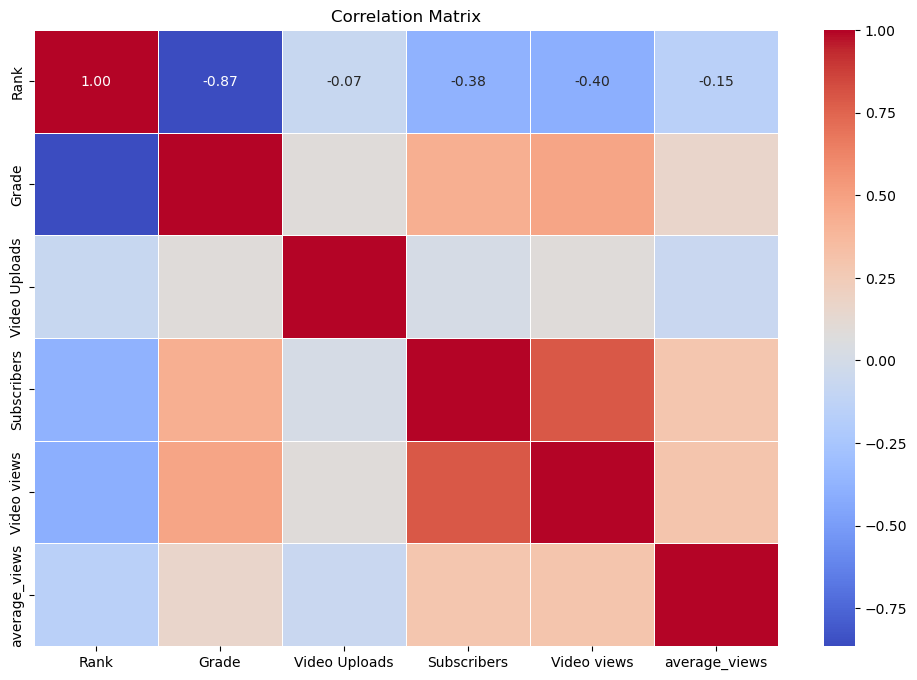

In [35]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

Top 5 Channels with Highest number of Video Uploads

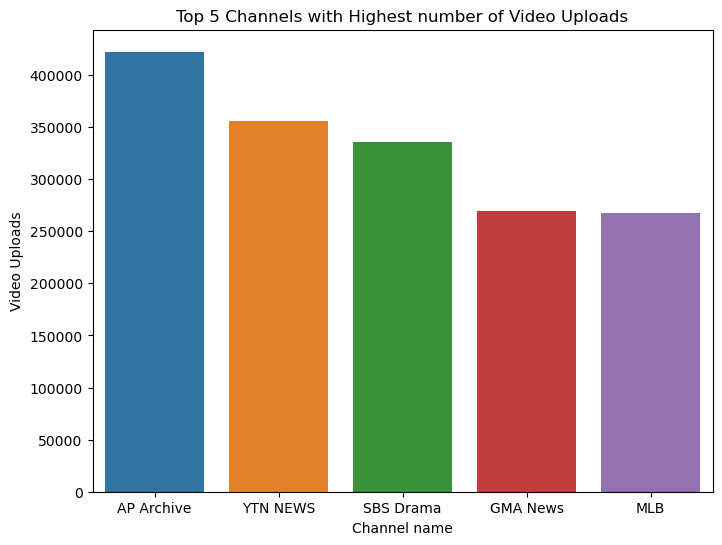

In [43]:
top_video_uploads = df.nlargest(5, "Video Uploads")

plt.figure(figsize=(8,6))
sns.barplot(x=top_video_uploads["Channel name"], y=top_video_uploads["Video Uploads"])
plt.title("Top 5 Channels with Highest number of Video Uploads")
plt.show()

Grade with Highest Number of Video Uploads

In [48]:
df.groupby('Grade')['Video Uploads'].sum()

Grade
1   8536620.00
2   4124010.00
3   5121740.00
4    678412.00
5    374507.00
Name: Video Uploads, dtype: float64

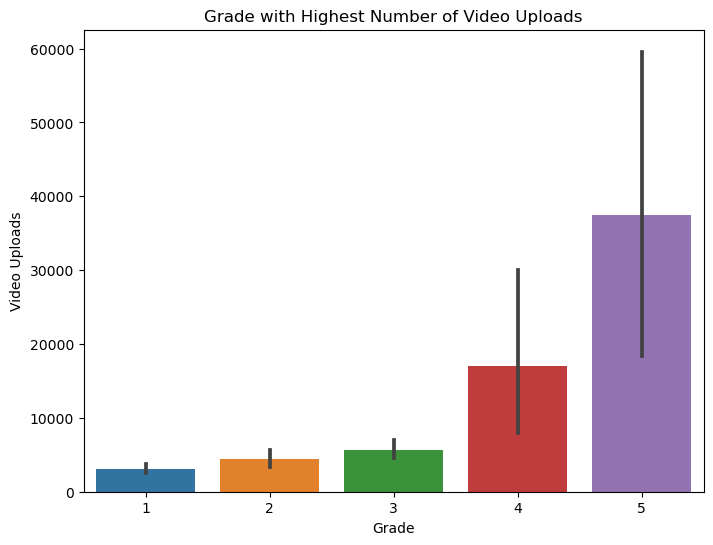

In [44]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['Grade'], y=df['Video Uploads'])
plt.title("Grade with Highest Number of Video Uploads")
plt.show()

- Channel with Grade 'A++' has much higher Video Uploads

Grade with Highest Average Views

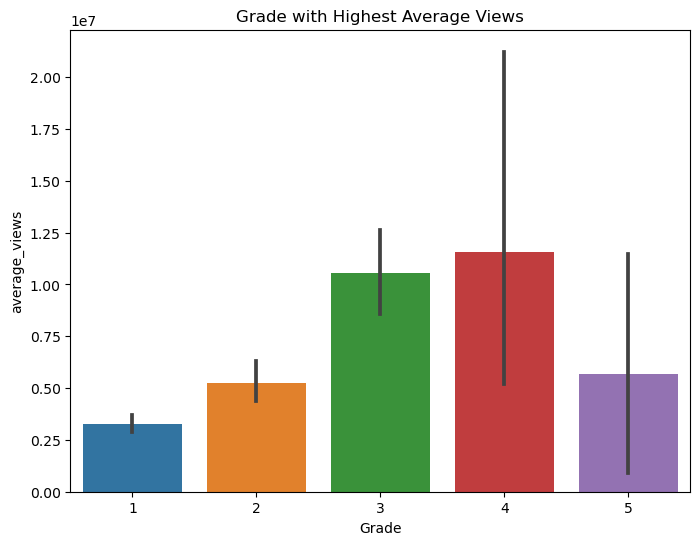

In [45]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['Grade'], y=df['average_views'])
plt.title("Grade with Highest Average Views")
plt.show()

- Channel with Grade 'A+' has the highest average views

Grade with the highest number of Subscribers

In [ ]:
df.groupby('Grade')['Subscribers'].sum()

Grade
1   4178836032.00
2   2633407673.00
3   4581101256.00
4    469077899.00
5    222817625.00
Name: Subscribers, dtype: float64

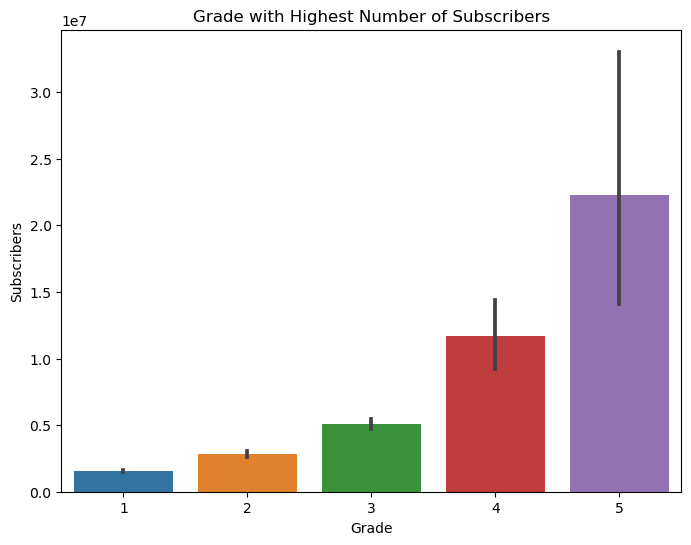

In [46]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['Grade'], y=df['Subscribers'])
plt.title("Grade with Highest Number of Subscribers")
plt.show()

- Channel with Grade 'A++' has much higher number of Subscribers

Grade with the highest number of Video Views

In [51]:
df.groupby('Grade')['Video views'].sum()

Grade
1    1511210409992
2    1037405476053
3    2240681735353
4     246749670909
5     211990911928
Name: Video views, dtype: int64

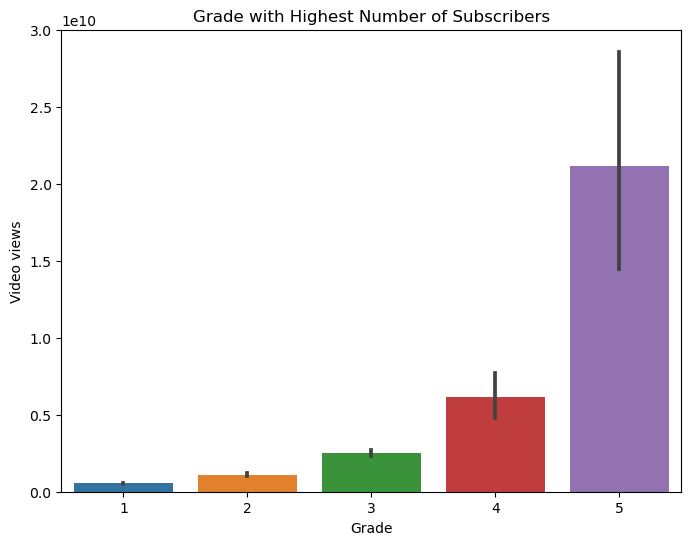

In [47]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['Grade'], y=df['Video views'])
plt.title("Grade with Highest Number of Subscribers")
plt.show()

- Channel with Grade 'A++' has much higher number of Video views

## Prediction Model

Feature selection & Preprocessing

In [52]:
df.columns

Index(['Rank', 'Grade', 'Channel name', 'Video Uploads', 'Subscribers',
       'Video views', 'average_views'],
      dtype='object')

In [77]:
X = df.drop(columns=["average_views", "Channel name", "Rank"])
y = df['average_views']

Feature Scaling
- Normalize or standardize numerical features to ensure they contribute equally to the model

In [78]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['Video Uploads', 'Subscribers', 'Video views']
df[numerical_features]= scaler.fit_transform(df[numerical_features])

Train Test Split

In [79]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

Model Building

In [80]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

i) Linear Regression

In [81]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

lr_predictions = lr.predict(X_test)
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

print("Linear Regression")
print(f"MAE: {lr_mae}")
print(f"MSE: {lr_mse}")
print(f"R2 score: {lr_r2}")

Linear Regression
MAE: 6344606.669648788
MSE: 376274850276520.94
R2 score: 0.07452672420219197


ii) Random Forest Regression

In [82]:
from sklearn.ensemble import RandomForestRegressor 

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

rf_predictions = rf.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print("Random Forest Regression")
print(f"MAE: {rf_mae}")
print(f"MSE: {rf_mse}")
print(f"R2 score: {rf_r2}")

Random Forest Regression
MAE: 865968.7557344235
MSE: 86325835504215.75
R2 score: 0.7876758074281149


XGBoost

In [83]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)

xgb_predictions = xgb.predict(X_test)
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)

print("XGBoost")
print(f"MAE: {xgb_mae}")
print(f"MSE: {xgb_mse}")
print(f"R2 score: {xgb_r2}")

XGBoost
MAE: 920900.3273780125
MSE: 69244127623226.8
R2 score: 0.8296894156648132


Comparison

In [84]:
lr_results = {
    "Model": ["Linear Regression"],
    "MAE": [lr_mae],
    "MSE": [lr_mse],
    "R2 score": [lr_r2]
}
rf_results = {
    "Model": ["Random Forest Regression"],
    "MAE": [rf_mae],
    "MSE": [rf_mse],
    "R2 score": [rf_r2]
}
xgb_results = {
    "Model": ["XGBoost"],
    "MAE": [xgb_mae],
    "MSE": [xgb_mse],
    "R2 score": [xgb_r2]
}

all_results = lr_results.copy()
all_results["Model"].extend(rf_results["Model"])
all_results["MAE"].extend(rf_results["MAE"])
all_results["MSE"].extend(rf_results["MSE"])
all_results["R2 score"].extend(rf_results["R2 score"])

all_results["Model"].extend(xgb_results["Model"])
all_results["MAE"].extend(xgb_results["MAE"])
all_results["MSE"].extend(xgb_results["MSE"])
all_results["R2 score"].extend(xgb_results["R2 score"])

results_df = pd.DataFrame(all_results)
results_df 


,Model,MAE,MSE,R2 score
0,Linear Regression,6344606.67,376274850276520.94,0.07
1,Random Forest Regression,865968.76,86325835504215.75,0.79
2,XGBoost,920900.33,69244127623226.80,0.83


- Linear regression is not a suitable model for this case. 
- This may be due to the non-linear relationships between the variables and the target
- As for RF and XGB, they have a much lower MAE compared to LR.
- This suggests that they are more accurate on average as the average prediction error went from 6 mil+ to 800k+
- As for R2 score, XGB indicates that it captures the relationship between features and target variable the best, with 83% of the variance in average_views